# positional_encoding

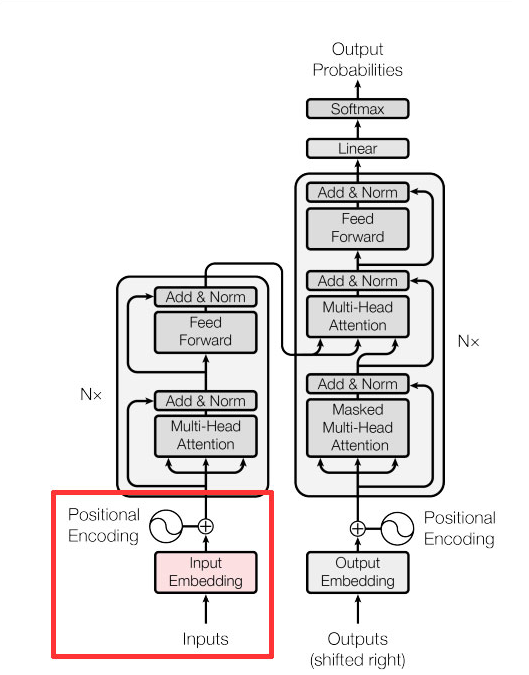

In [1]:
import numpy as np

def positional_encoding(pos, d_model):
    def cal_angle(position, i):
        return position / np.power(10000, int(i) / d_model)

    def get_posi_angle_vec(position):
        return [cal_angle(position, i) for i in range(d_model)]

    sinusoid_table = np.array([get_posi_angle_vec(pos_i) for pos_i in range(pos)])

    sinusoid_table[:, 0::2] = np.sin(sinusoid_table[:, 0::2])
    sinusoid_table[:, 1::2] = np.cos(sinusoid_table[:, 1::2])

    return sinusoid_table

pos = 2
d_model = 4
i = 0

print("Positional Encoding 값:\n", positional_encoding(pos, d_model))

print("")
print("if pos == 0, i == 0: ", np.sin(0 / np.power(10000, 2 * i / d_model)))
print("if pos == 1, i == 0: ", np.sin(1 / np.power(10000, 2 * i / d_model)))
print("if pos == 2, i == 0: ", np.sin(2 / np.power(10000, 2 * i / d_model)))
print("if pos == 3, i == 0: ", np.sin(3 / np.power(10000, 2 * i / d_model)))

print("")
print("if pos == 0, i == 1: ", np.cos(0 / np.power(10000, 2 * i + 1 / d_model)))
print("if pos == 1, i == 1: ", np.cos(1 / np.power(10000, 2 * i + 1 / d_model)))
print("if pos == 2, i == 1: ", np.cos(2 / np.power(10000, 2 * i + 1 / d_model)))
print("if pos == 3, i == 1: ", np.cos(3 / np.power(10000, 2 * i + 1 / d_model)))

Positional Encoding 값:
 [[0.         1.         0.         1.        ]
 [0.84147098 0.99500417 0.00999983 0.9999995 ]]

if pos == 0, i == 0:  0.0
if pos == 1, i == 0:  0.8414709848078965
if pos == 2, i == 0:  0.9092974268256817
if pos == 3, i == 0:  0.1411200080598672

if pos == 0, i == 1:  1.0
if pos == 1, i == 1:  0.9950041652780258
if pos == 2, i == 1:  0.9800665778412416
if pos == 3, i == 1:  0.955336489125606


### np.power은 제곱을 시켜줍니다

In [ ]:
np.power(4,2)

16

# positional_encoding 함수 뜯어보기

In [4]:
def positional_encoding(pos, d_model):
    def cal_angle(position, i):
        return position / np.power(10000, int(i) / d_model)

    def get_posi_angle_vec(position):
        return [cal_angle(position, i) for i in range(d_model)]

    sinusoid_table = np.array([get_posi_angle_vec(pos_i) for pos_i in range(pos)])

    sinusoid_table[:, 0::2] = np.sin(sinusoid_table[:, 0::2])
    sinusoid_table[:, 1::2] = np.cos(sinusoid_table[:, 1::2])

    return sinusoid_table

pos = 7 


d_model = 4


i = 0

로 가정하고 진행합니다

In [2]:
for i in range(d_model):
  x = 7 / np.power(10000, int(i) / d_model)
  print(x)

7.0
0.7
0.07
0.007


In [ ]:
y = [1.0 for i in range(d_model)]
y

[1.0, 1.0, 1.0, 1.0]

In [3]:
for i in range(d_model):
  x = 7 / np.power(10000, int(i) / d_model)
  y = [x for i in range(d_model)]
  print(y)

[7.0, 7.0, 7.0, 7.0]
[0.7, 0.7, 0.7, 0.7]
[0.07, 0.07, 0.07, 0.07]
[0.007, 0.007, 0.007, 0.007]


In [5]:
sinusoid_table = np.array([y for pos_i in range(7)])
sinusoid_table

array([[0.007, 0.007, 0.007, 0.007],
       [0.007, 0.007, 0.007, 0.007],
       [0.007, 0.007, 0.007, 0.007],
       [0.007, 0.007, 0.007, 0.007],
       [0.007, 0.007, 0.007, 0.007],
       [0.007, 0.007, 0.007, 0.007],
       [0.007, 0.007, 0.007, 0.007]])

In [6]:
def positional_encoding(pos, d_model):
    def cal_angle(position, i):
        return position / np.power(10000, int(i) / d_model)

    def get_posi_angle_vec(position):
        return [cal_angle(position, i) for i in range(d_model)]

    sinusoid_table = np.array([get_posi_angle_vec(pos_i) for pos_i in range(pos)])

    return sinusoid_table

In [7]:
a = positional_encoding(7, 4)
a

array([[0.e+00, 0.e+00, 0.e+00, 0.e+00],
       [1.e+00, 1.e-01, 1.e-02, 1.e-03],
       [2.e+00, 2.e-01, 2.e-02, 2.e-03],
       [3.e+00, 3.e-01, 3.e-02, 3.e-03],
       [4.e+00, 4.e-01, 4.e-02, 4.e-03],
       [5.e+00, 5.e-01, 5.e-02, 5.e-03],
       [6.e+00, 6.e-01, 6.e-02, 6.e-03]])

In [10]:
a[:, 0::2] = np.sin(a[:, 0::2])
a

array([[0.00699989, 0.        , 0.00699989, 0.        ],
       [0.00699989, 0.1       , 0.00699989, 0.001     ],
       [0.00699989, 0.2       , 0.00699989, 0.002     ],
       [0.00699989, 0.3       , 0.00699989, 0.003     ],
       [0.00699989, 0.4       , 0.00699989, 0.004     ],
       [0.00699989, 0.5       , 0.00699989, 0.005     ],
       [0.00699989, 0.6       , 0.00699989, 0.006     ]])

In [12]:
a[:, 1::2] = np.cos(a[:, 1::2])
a

array([[0.00699989, 0.54030231, 0.00699989, 0.54030231],
       [0.00699989, 0.5444994 , 0.00699989, 0.54030273],
       [0.00699989, 0.55696725, 0.00699989, 0.54030399],
       [0.00699989, 0.57733404, 0.00699989, 0.54030609],
       [0.00699989, 0.60497569, 0.00699989, 0.54030904],
       [0.00699989, 0.63901249, 0.00699989, 0.54031282],
       [0.00699989, 0.6783104 , 0.00699989, 0.54031745]])

In [14]:
x = np.array([[0.00699989, 0.54030231, 0.00699989, 0.54030231],
       [0.00699989, 0.5444994 , 0.00699989, 0.54030273],
       [0.00699989, 0.55696725, 0.00699989, 0.54030399],
       [0.00699989, 0.57733404, 0.00699989, 0.54030609],
       [0.00699989, 0.60497569, 0.00699989, 0.54030904],
       [0.00699989, 0.63901249, 0.00699989, 0.54031282],
       [0.00699989, 0.6783104 , 0.00699989, 0.54031745]])
x[:, 1::2]

array([[0.54030231, 0.54030231],
       [0.5444994 , 0.54030273],
       [0.55696725, 0.54030399],
       [0.57733404, 0.54030609],
       [0.60497569, 0.54030904],
       [0.63901249, 0.54031282],
       [0.6783104 , 0.54031745]])

In [15]:
a[:, 0::2] = np.sin(a[:, 0::2])
a[:, 1::2] = np.cos(a[:, 1::2])
a

array([[0.00699983, 0.85755322, 0.00699983, 0.85755322],
       [0.00699983, 0.85538671, 0.00699983, 0.857553  ],
       [0.00699983, 0.84886217, 0.00699983, 0.85755235],
       [0.00699983, 0.83792068, 0.00699983, 0.85755127],
       [0.00699983, 0.82251593, 0.00699983, 0.85754975],
       [0.00699983, 0.8026851 , 0.00699983, 0.85754781],
       [0.00699983, 0.77863402, 0.00699983, 0.85754542]])

In [ ]:
sinusoid_table[:, 0::2] = np.sin(sinusoid_table[:, 0::2])
sinusoid_table

array([[ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.74562414,  0.1       ,  0.00999967,  0.001     ],
       [ 0.78907234,  0.2       ,  0.01999733,  0.002     ],
       [ 0.14065208,  0.3       ,  0.029991  ,  0.003     ],
       [-0.68660026,  0.4       ,  0.03997868,  0.004     ],
       [-0.81857414,  0.5       ,  0.04995836,  0.005     ],
       [-0.27579386,  0.6       ,  0.05992808,  0.006     ]])

In [ ]:
sinusoid_table[:, 1::2] = np.cos(sinusoid_table[:, 1::2])
sinusoid_table

array([[ 0.        ,  1.        ,  0.        ,  1.        ],
       [ 0.74562414,  0.99500417,  0.00999967,  0.9999995 ],
       [ 0.78907234,  0.98006658,  0.01999733,  0.999998  ],
       [ 0.14065208,  0.95533649,  0.029991  ,  0.9999955 ],
       [-0.68660026,  0.92106099,  0.03997868,  0.999992  ],
       [-0.81857414,  0.87758256,  0.04995836,  0.9999875 ],
       [-0.27579386,  0.82533561,  0.05992808,  0.999982  ]])

In [ ]:
test = np.array([[ 0.        ,  1.        ,  0.        ,  1.        ],
       [ 0.74562414,  0.99500417,  0.00999967,  0.9999995 ],
       [ 0.78907234,  0.98006658,  0.01999733,  0.999998  ],
       [ 0.14065208,  0.95533649,  0.029991  ,  0.9999955 ],
       [-0.68660026,  0.92106099,  0.03997868,  0.999992  ],
       [-0.81857414,  0.87758256,  0.04995836,  0.9999875 ],
       [-0.27579386,  0.82533561,  0.05992808,  0.999982  ]])
test[:, 1::2]

array([[1.        , 1.        ],
       [0.99500417, 0.9999995 ],
       [0.98006658, 0.999998  ],
       [0.95533649, 0.9999955 ],
       [0.92106099, 0.999992  ],
       [0.87758256, 0.9999875 ],
       [0.82533561, 0.999982  ]])